# Problem Statement

In the era of widespread internet use, it is necessary for businesses to understand what the consumers think of their products. If they can understand what the consumers like or dislike about their products, they can improve them and thereby increase their profits by keeping their customers happy. For this reason, they analyze the reviews of their products on websites such as Amazon or Snapdeal by using text mining and sentiment analysis techniques. 

Task 1:
1.	Extract reviews of any product from e-commerce website Amazon.
2.	Perform sentiment analysis on this extracted data and build a unigram and bigram word cloud. 


Task 2:
1.	Extract reviews for any movie from IMDB and perform sentiment analysis.

Task 3: 
1.	Choose any other website on the internet and do some research on how to extract text and perform sentiment analysis


-------------------------- #### ----------------------------------

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## For Task Number 1, we will use reviews for Fossil Chronograph Black Men Watch FS4832

In [2]:
fossil_reivews = [] # Creating a blank list

In [3]:
for i in range(1,31): # Range to go over 30 pages of reviews
    ip=[]
    url = "https://www.amazon.in/Fossil-Grant-Chronograph-Analog-Black/product-reviews/B00BEU5CTE/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.find_all("span",attrs={"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    
    fossil_reivews=fossil_reivews+ip

In [4]:
with open('fossil.txt','w', encoding='utf-8') as output:
    output.write(str(fossil_reivews))

In [5]:
ip_rev_string = " ".join(fossil_reivews)

In [6]:
import nltk

In [7]:
from nltk.corpus import stopwords

In [8]:
ip_rev_string = re.sub("[^A-Za-z" "]+"," ", ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ", ip_rev_string)

In [9]:
ip_review_words = ip_rev_string.split(" ")

In [10]:
ip_review_words

['',
 'your',
 'browser',
 'does',
 'not',
 'support',
 'html',
 'video',
 'recieved',
 'it',
 'in',
 'a',
 'very',
 'bad',
 'condition',
 'a',
 'broken',
 'watch',
 'for',
 'lesson',
 'learnt',
 'not',
 'to',
 'buy',
 'such',
 'stuff',
 'here',
 'best',
 'to',
 'buy',
 'from',
 'authorised',
 'showroom',
 'as',
 'the',
 'chronograph',
 'is',
 'not',
 'working',
 'in',
 'this',
 'watch',
 'i',
 'received',
 'this',
 'watch',
 'and',
 'have',
 'immediately',
 'visited',
 'the',
 'store',
 'and',
 'checked',
 'with',
 'them',
 'whether',
 'it',
 'is',
 'real',
 'or',
 'fake',
 'they',
 'certified',
 'that',
 'it',
 'is',
 'a',
 'real',
 'one',
 'i',
 'suggest',
 'you',
 'all',
 'to',
 'do',
 'this',
 'its',
 'is',
 'a',
 'fake',
 'product',
 'i',
 'am',
 'posting',
 'few',
 'pics',
 'just',
 'have',
 'a',
 'look',
 'stop',
 'watch',
 'hands',
 'are',
 'faulty',
 'not',
 'calibrated',
 'to',
 'stop',
 'at',
 'warranty',
 'card',
 'missing',
 'i',
 'got',
 'an',
 'used',
 'product',
 'as',

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
vectorizer = TfidfVectorizer(ip_review_words, use_idf=True, ngram_range=(1,3))
X = vectorizer.fit_transform(ip_review_words)

C:\Users\jaich\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass input=['', 'your', 'browser', 'does', 'not', 'support', 'html', 'video', 'recieved', 'it', 'in', 'a', 'very', 'bad', 'condition', 'a', 'broken', 'watch', 'for', 'lesson', 'learnt', 'not', 'to', 'buy', 'such', 'stuff', 'here', 'best', 'to', 'buy', 'from', 'authorised', 'showroom', 'as', 'the', 'chronograph', 'is', 'not', 'working', 'in', 'this', 'watch', 'i', 'received', 'this', 'watch', 'and', 'have', 'immediately', 'visited', 'the', 'store', 'and', 'checked', 'with', 'them', 'whether', 'it', 'is', 'real', 'or', 'fake', 'they', 'certified', 'that', 'it', 'is', 'a', 'real', 'one', 'i', 'suggest', 'you', 'all', 'to', 'do', 'this', 'its', 'is', 'a', 'fake', 'product', 'i', 'am', 'posting', 'few', 'pics', 'just', 'have', 'a', 'look', 'stop', 'watch', 'hands', 'are', 'faulty', 'not', 'calibrated', 'to', 'stop', 'at', 'warranty', 'card', 'missing', 'i', 'got', 'an', 'used', 'product', 'as', 'the', 

In [13]:
with open("stop.txt","r") as sw:
    stop_words = sw.read()

stop_words = stop_words.split("/n")

In [14]:
ip_review_words = [w for w in ip_review_words if not w in stop_words]

In [15]:
ip_review_string = " ".join(ip_review_words)
ip_review_string

' your browser does not support html video recieved it in a very bad condition a broken watch for lesson learnt not to buy such stuff here best to buy from authorised showroom as the chronograph is not working in this watch i received this watch and have immediately visited the store and checked with them whether it is real or fake they certified that it is a real one i suggest you all to do this its is a fake product i am posting few pics just have a look stop watch hands are faulty not calibrated to stop at warranty card missing i got an used product as the protective tape on the strap was missing the joints of the strap are discolored the quality as expected is the best in the market though i got it at a price of rs the original price is like a bit too high but the benefits that come with them totally justifies the price it s been exactly one year that i have used this watch i was pretty thrilled when i bought it for me it was personally a great learning that even amazon sells dupli

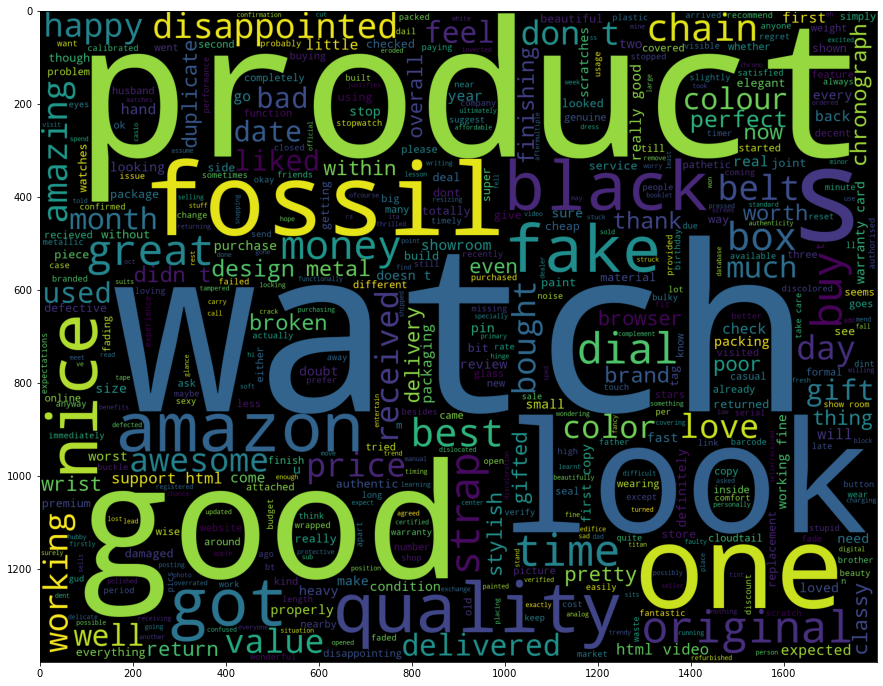

In [16]:
plt.rcParams['figure.figsize']=(15,20)
wordcloud_ip = WordCloud(
                      background_color='Black',
                      width=1800,
                      height=1400,
                      max_words=500,
                      ).generate(ip_review_string)

plt.imshow(wordcloud_ip)

Extending our stop words to include some words which we feel like needs to be excluded

In [17]:
stop_words.extend(["i","got","fossil","amazon","u","ask","dont","think","t","now","lot","n","soo","watch","product","a","s","to",
                  "ok","u","it","so","this","is","at", "don","in","one","the","of","any","not","he","she","am","by","you","the","and","as","do","its",
                  "for","as","has","if","my","till","there","can","get","or","on","k", "as"])

In [18]:
ip_review_words = [w for w in ip_review_words if not w in stop_words]

In [19]:
ip_review_string = " ".join(ip_review_words)
ip_review_string

' your browser does support html video recieved very bad condition broken lesson learnt buy such stuff here best buy from authorised showroom chronograph working received have immediately visited store checked with them whether real fake they certified that real suggest all fake posting few pics just have look stop hands are faulty calibrated stop warranty card missing an used protective tape strap was missing joints strap are discolored quality expected best market though price rs original price like bit too high but benefits that come with them totally justifies price been exactly year that have used was pretty thrilled when bought me was personally great learning that even sells duplicate products see photo attached chain lost elegant black color within just months use block chain was defected pin always used come out due fell from hand many times ultimately glass big crack though returning but was too late bought another dad from showroom turned out that was duplicate simply awesom

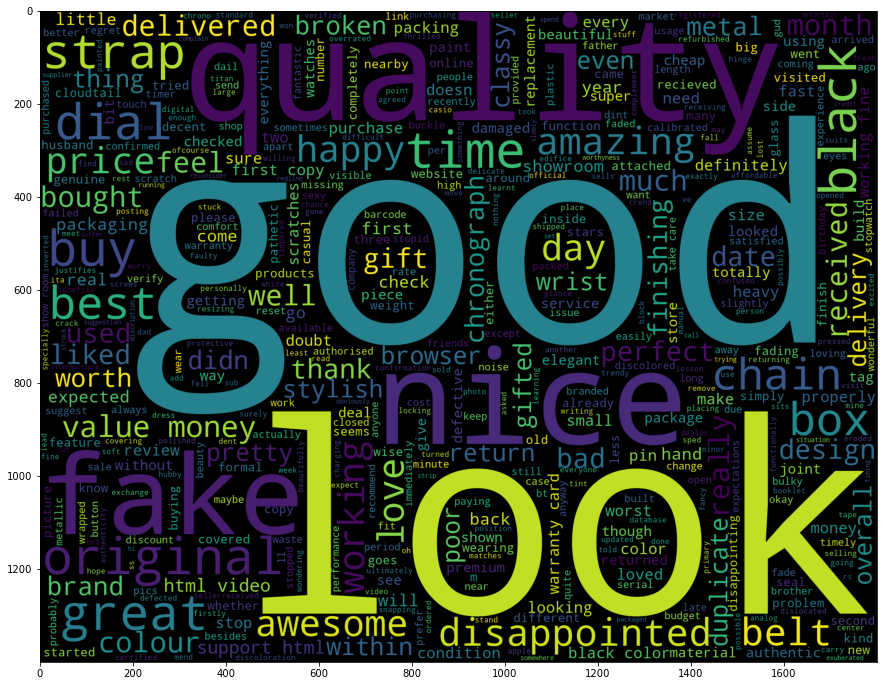

In [20]:
plt.rcParams['figure.figsize']=(15,20)
wordcloud_ip = WordCloud(
                      background_color='Black',
                      width=1800,
                      height=1400,
                      max_words=500,
                      ).generate(ip_review_string)

plt.imshow(wordcloud_ip)

## Positive Words

In [21]:
with open("positive-words.txt", "r") as pos:
    poswords = pos.read().split("\n")
    

#poswords
#ip_review_words

In [22]:
ip_pos_in_pos = " ".join([w for w in ip_review_words if w in poswords])
ip_pos_in_pos

'support best protective best like benefits pretty thrilled great elegant awesome liked best great better best happy well best prefer excited fine happy work authentic authentic pretty liked good lead good delicate fast happy fast love nice enough like fancy well like fine like authentic won willing best good loving stylish awesome good wise good properly properly good fine classy decent good like polished best available fresh trendy classy complement great soft like good like genuine good beautifully beautiful affordable genuine entertain properly perfect well well great genuine happy good impress worth recommended decent durable love good affection worthy happy perfect comfort love gifted loved super happy thank like support good good like great worth amazing good like satisfied good support liked super sexy well gifted liked stylish best better awesome gifted nice decent good well stunning best wise happy classic nice nice top like nice good illuminate good trust pretty good like lo

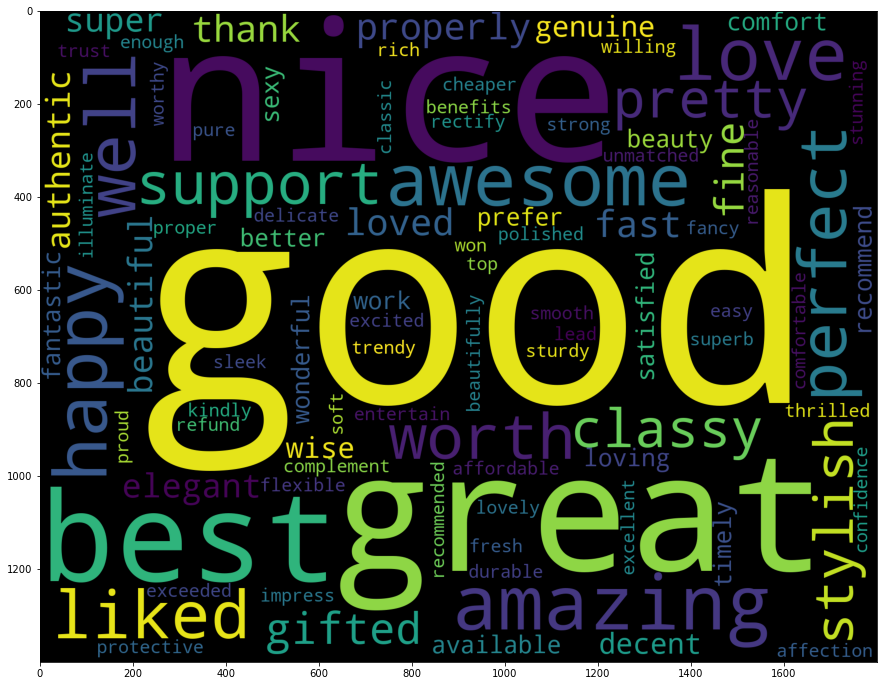

In [23]:
wordcloud_pos_in_pos = WordCloud(
                      background_color='Black',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)
plt.imshow(wordcloud_pos_in_pos)

## Negative Words

In [24]:
with open('negative-words.txt',"r") as neg:
    negwords = neg.read().split('\n')

In [25]:
ip_neg_in_neg = " ".join([w for w in ip_review_words if w in negwords])

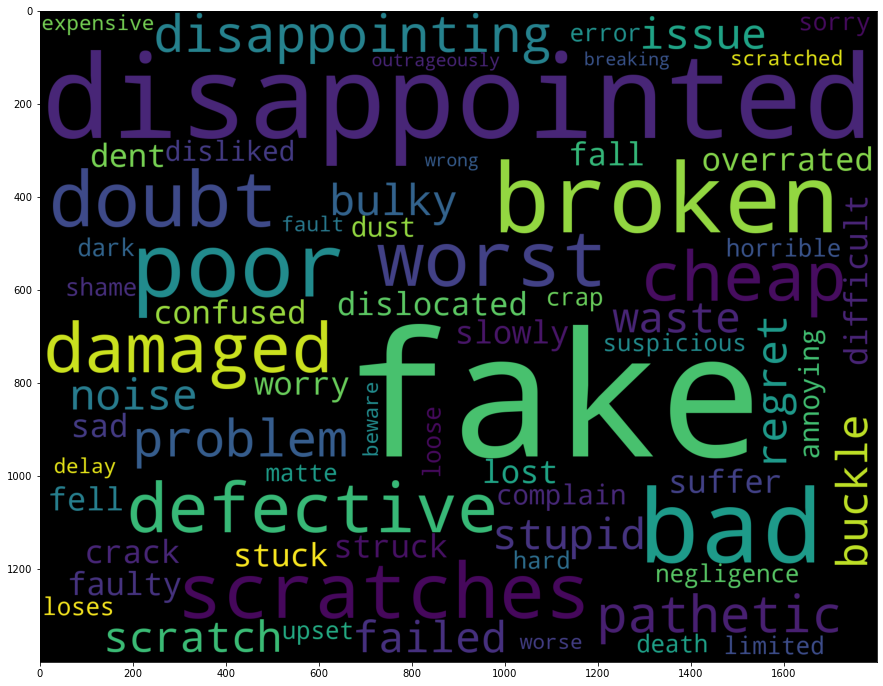

In [26]:
wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)
plt.imshow(wordcloud_neg_in_neg)

## Bigram Word Cloud

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jaich\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
WNL = nltk.WordNetLemmatizer()

In [29]:
text = ip_review_string.lower()

In [35]:
text

' your browser does support html video recieved very bad condition broken lesson learnt buy such stuff here best buy from authorised showroom chronograph working received have immediately visited store checked with them whether real fake they certified that real suggest all fake posting few pics just have look stop hands are faulty calibrated stop warranty card missing an used protective tape strap was missing joints strap are discolored quality expected best market though price rs original price like bit too high but benefits that come with them totally justifies price been exactly year that have used was pretty thrilled when bought me was personally great learning that even sells duplicate products see photo attached chain lost elegant black color within just months use block chain was defected pin always used come out due fell from hand many times ultimately glass big crack though returning but was too late bought another dad from showroom turned out that was duplicate simply awesom

In [42]:
text = text.replace("'", "")
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

In [45]:
text_content = [s for s in text1 if len(s) !=0]
text_content = [WNL.lemmatize(t) for t in text1]
text_content

['your',
 'browser',
 'doe',
 'support',
 'html',
 'video',
 'recieved',
 'very',
 'bad',
 'condition',
 'broken',
 'lesson',
 'learnt',
 'buy',
 'such',
 'stuff',
 'here',
 'best',
 'buy',
 'from',
 'authorised',
 'showroom',
 'chronograph',
 'working',
 'received',
 'have',
 'immediately',
 'visited',
 'store',
 'checked',
 'with',
 'them',
 'whether',
 'real',
 'fake',
 'they',
 'certified',
 'that',
 'real',
 'suggest',
 'all',
 'fake',
 'posting',
 'few',
 'pic',
 'just',
 'have',
 'look',
 'stop',
 'hand',
 'are',
 'faulty',
 'calibrated',
 'stop',
 'warranty',
 'card',
 'missing',
 'an',
 'used',
 'protective',
 'tape',
 'strap',
 'wa',
 'missing',
 'joint',
 'strap',
 'are',
 'discolored',
 'quality',
 'expected',
 'best',
 'market',
 'though',
 'price',
 'r',
 'original',
 'price',
 'like',
 'bit',
 'too',
 'high',
 'but',
 'benefit',
 'that',
 'come',
 'with',
 'them',
 'totally',
 'justifies',
 'price',
 'been',
 'exactly',
 'year',
 'that',
 'have',
 'used',
 'wa',
 'pretty

In [49]:
#nltk_tokens = nltk.word_tokenize(text1)
bigram_list = list(nltk.bigrams(text_content))
print(bigram_list)

[('your', 'browser'), ('browser', 'doe'), ('doe', 'support'), ('support', 'html'), ('html', 'video'), ('video', 'recieved'), ('recieved', 'very'), ('very', 'bad'), ('bad', 'condition'), ('condition', 'broken'), ('broken', 'lesson'), ('lesson', 'learnt'), ('learnt', 'buy'), ('buy', 'such'), ('such', 'stuff'), ('stuff', 'here'), ('here', 'best'), ('best', 'buy'), ('buy', 'from'), ('from', 'authorised'), ('authorised', 'showroom'), ('showroom', 'chronograph'), ('chronograph', 'working'), ('working', 'received'), ('received', 'have'), ('have', 'immediately'), ('immediately', 'visited'), ('visited', 'store'), ('store', 'checked'), ('checked', 'with'), ('with', 'them'), ('them', 'whether'), ('whether', 'real'), ('real', 'fake'), ('fake', 'they'), ('they', 'certified'), ('certified', 'that'), ('that', 'real'), ('real', 'suggest'), ('suggest', 'all'), ('all', 'fake'), ('fake', 'posting'), ('posting', 'few'), ('few', 'pic'), ('pic', 'just'), ('just', 'have'), ('have', 'look'), ('look', 'stop'),

In [51]:
dictionary2 = [' '.join(tup) for tup in bigram_list]
print (dictionary2)

['your browser', 'browser doe', 'doe support', 'support html', 'html video', 'video recieved', 'recieved very', 'very bad', 'bad condition', 'condition broken', 'broken lesson', 'lesson learnt', 'learnt buy', 'buy such', 'such stuff', 'stuff here', 'here best', 'best buy', 'buy from', 'from authorised', 'authorised showroom', 'showroom chronograph', 'chronograph working', 'working received', 'received have', 'have immediately', 'immediately visited', 'visited store', 'store checked', 'checked with', 'with them', 'them whether', 'whether real', 'real fake', 'fake they', 'they certified', 'certified that', 'that real', 'real suggest', 'suggest all', 'all fake', 'fake posting', 'posting few', 'few pic', 'pic just', 'just have', 'have look', 'look stop', 'stop hand', 'hand are', 'are faulty', 'faulty calibrated', 'calibrated stop', 'stop warranty', 'warranty card', 'card missing', 'missing an', 'an used', 'used protective', 'protective tape', 'tape strap', 'strap wa', 'wa missing', 'missin

## We will use count vectoriser to view the freqeuncy of bigrams

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
vectorizer = CountVectorizer(ngram_range=(2,2))

In [54]:
bag_of_words = vectorizer.fit_transform(dictionary2)

In [55]:
vectorizer.vocabulary_

{'your browser': 2419,
 'browser doe': 302,
 'doe support': 678,
 'support html': 1954,
 'html video': 1077,
 'video recieved': 2158,
 'recieved very': 1702,
 'very bad': 2130,
 'bad condition': 143,
 'condition broken': 496,
 'broken lesson': 294,
 'lesson learnt': 1154,
 'learnt buy': 1150,
 'buy such': 367,
 'such stuff': 1942,
 'stuff here': 1924,
 'here best': 1054,
 'best buy': 208,
 'buy from': 359,
 'from authorised': 866,
 'authorised showroom': 121,
 'showroom chronograph': 1825,
 'chronograph working': 440,
 'working received': 2376,
 'received have': 1693,
 'have immediately': 1036,
 'immediately visited': 1088,
 'visited store': 2165,
 'store checked': 1901,
 'checked with': 430,
 'with them': 2345,
 'them whether': 2007,
 'whether real': 2290,
 'real fake': 1678,
 'fake they': 789,
 'they certified': 2011,
 'certified that': 399,
 'that real': 1999,
 'real suggest': 1681,
 'suggest all': 1944,
 'all fake': 38,
 'fake posting': 783,
 'posting few': 1588,
 'few pic': 823,
 

In [57]:
sum_words = bag_of_words.sum(axis=0)
word_freq = [(word, sum_words[0,idx]) for word, idx in vectorizer.vocabulary_.items()]
word_freq = sorted(word_freq, key= lambda x: x[1], reverse=True)
print(word_freq[:300])

[('value money', 11), ('good but', 9), ('your browser', 7), ('browser doe', 7), ('doe support', 7), ('support html', 7), ('html video', 7), ('look good', 7), ('really good', 6), ('very good', 6), ('very bad', 5), ('warranty card', 5), ('black color', 5), ('working fine', 5), ('happy with', 5), ('first copy', 5), ('belt wa', 4), ('look like', 4), ('very stylish', 4), ('look amazing', 4), ('hand are', 3), ('that wa', 3), ('best gift', 3), ('but happy', 3), ('return good', 3), ('doubt that', 3), ('le than', 3), ('than year', 3), ('very happy', 3), ('like fake', 3), ('amazing look', 3), ('metal strap', 3), ('have gifted', 3), ('very much', 3), ('very disappointed', 3), ('nice good', 3), ('copy original', 3), ('buy from', 2), ('checked with', 2), ('with them', 2), ('real fake', 2), ('that real', 2), ('all fake', 2), ('an used', 2), ('strap are', 2), ('have used', 2), ('duplicate product', 2), ('elegant black', 2), ('chain wa', 2), ('come out', 2), ('wa too', 2), ('out that', 2), ('wa duplic

## Bigram WordCloud

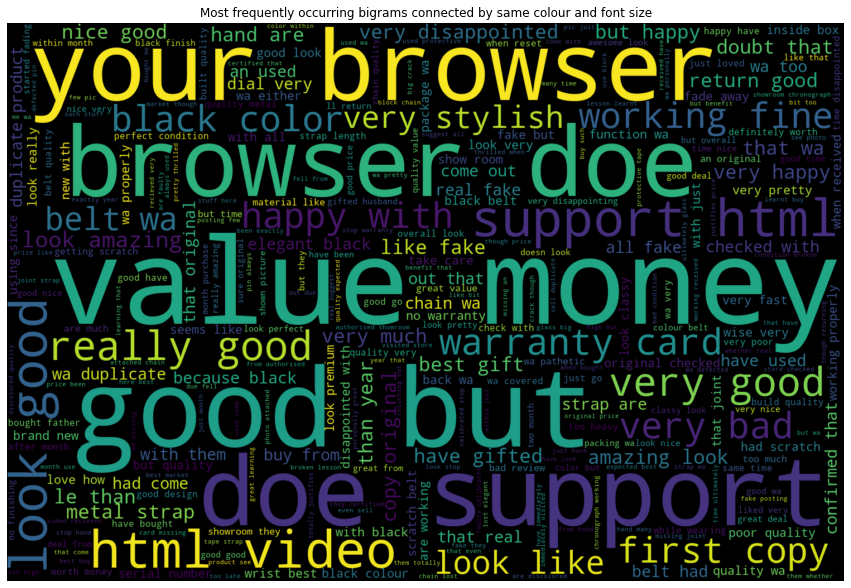

In [60]:
words_dict = dict(word_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 300
wordCloud = WordCloud(max_words = WC_max_words, height=WC_height, width=WC_width)
wordCloud.generate_from_frequencies(words_dict)
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We have successfully extracted reviews from Amazon.in. We then removed stop words and special characters from the reviews, we also extended our stopwords to exclude certain words which did not make sense

- We created Unigram wordcloud of all words
- We created Unigram wordcloud of only positive words
- We created Unigram wordcloud of only negative words
- We created Bigram wordcloud of all words. 

We can see that many words are related to browser, would need to deep dive to understand why browser would be used for a watch. Overall generally happy reviews.

## The way Business/client can use this information is as follows:

- Client can see the most common words used by customers when giving feedback on the product
- Top positive words and Top negative words used by customers
- We can deep dive further on negative comments to understand why customers are not happy
